In [1]:
### THIS CELL SETS UP THE GOOGLE COLAB ENVIRONMENT. 
### IF RUNNING THIS NOTEBOOK LOCALLY, IT MAY BE SAFELY DELETED.

#@title Install software

#@markdown #### Installation requires two steps.

#@markdown 1. Install the software by pressing the _Play_ button on the left.

try:
    import google.colab
    RUNNING_IN_COLAB = True
except ImportError:
    RUNNING_IN_COLAB = False
except Exception as e: 
    err = "Could not figure out if runnning in a colab notebook\n"
    raise Exception(err) from e

if RUNNING_IN_COLAB:
    !pip install dataprob

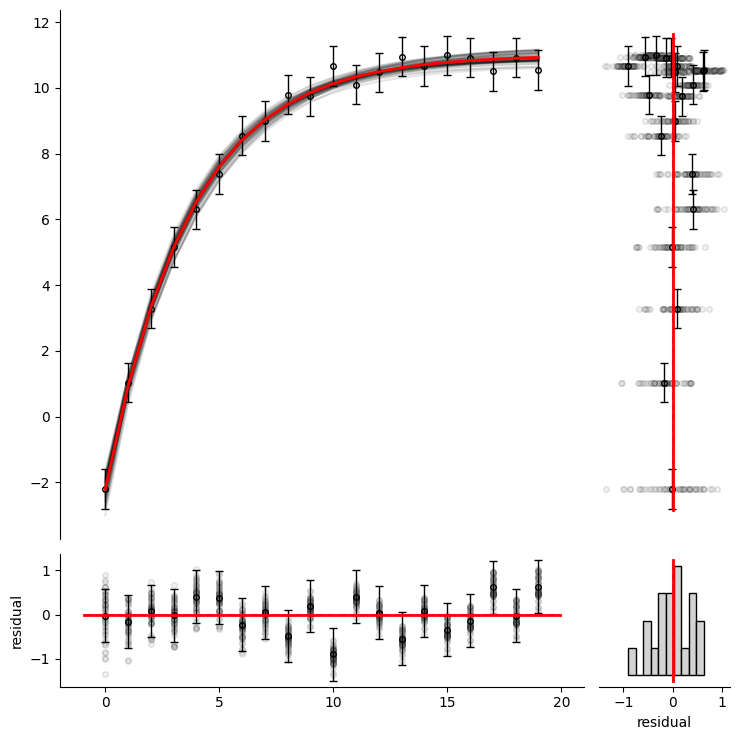

In [3]:
%matplotlib inline
import dataprob
import numpy as np

# ------------------------------------------------------------------------
# Define model and generate data

def exponential_saturation(a,b,k,x): 
    
    return a*(1 - np.exp(-k*(x))) + b

gen_params = {"a":13,
              "b":-2,
              "k":0.5}

err = 0.3
num_points = 20

x = np.linspace(0,10,num_points)
y_obs = exponential_saturation(x=x,**gen_params) + np.random.normal(0,err,num_points)
y_std = 2*err

test_fcn = exponential_saturation
non_fit_kwargs = {"x":x}

# ------------------------------------------------------------------------
# Run analysis

f = dataprob.setup(some_function=test_fcn,
                   method="ml",
                   non_fit_kwargs=non_fit_kwargs)

f.param_df.loc[["a","b","k"],"guess"] = [1,1,1]

f.param_df.loc["k","lower_bound"] = 1e-12
f.param_df.loc["k","upper_bound"] = 2

f.fit(y_obs=y_obs,
      y_std=y_std)


fig = dataprob.plot_summary(f)


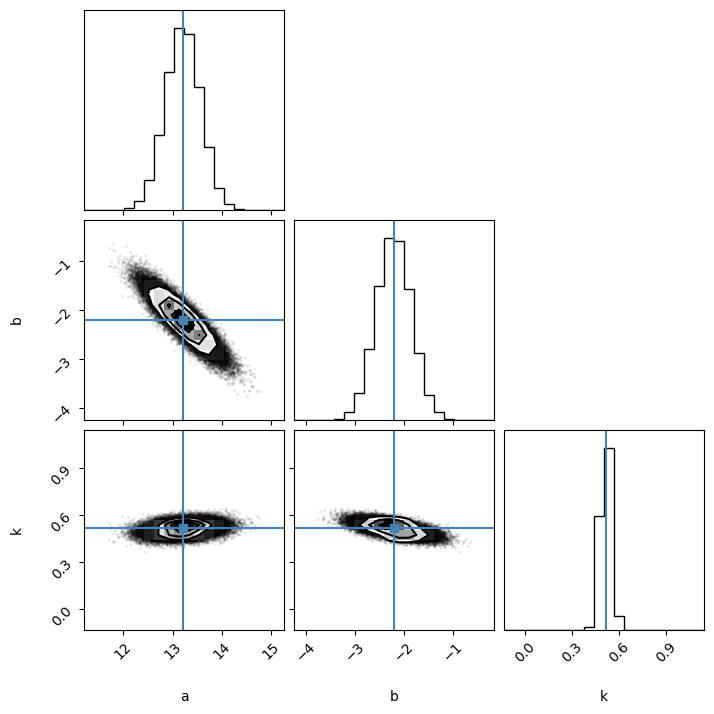

In [4]:
fig = dataprob.plot_corner(f)

In [5]:
f.fit_df

,name,estimate,std,low_95,high_95,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,,,,,
a,a,13.210477,0.355330,12.457212,13.963742,1.0,False,-inf,inf,NaN,NaN
b,b,-2.211124,0.357099,-2.968140,-1.454108,1.0,False,-inf,inf,NaN,NaN
k,k,0.516191,0.031632,0.449134,0.583248,1.0,False,1.000000e-12,2.0,NaN,NaN
